In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv("college_stats.csv")
df

,?Rk,Player,Class,Season,Pos,School,Conf,G,MP,PER,...,PProd,ORtg,DRtg,OWS,DWS,WS,OBPM,DBPM,BPM,Drafted
0,1,Anthony Davis,1,11-Dec,F,Kentucky,SEC,40,1281,35.1,...,550,139.0,80.7,5.9,4.1,9.9,7.8,10.8,18.7,1
1,2,Frank Kaminsky,4,2014-15,C,Wisconsin,Big Ten,39,1311,34.4,...,691,129.6,92.6,6.9,2.9,9.8,9.5,5.8,15.3,1
2,3,Kemba Walker,3,10-Nov,G,Connecticut,Big East,41,1543,29.9,...,930,121.2,98.9,7.3,2.4,9.7,10.2,2.7,12.9,1
3,4,Brandon Clarke,3,2018-19,F,Gonzaga,WCC,37,1040,37.2,...,603,137.9,84.0,5.5,3.2,8.8,8.9,10.0,18.9,1
4,5,Thomas Walkup,4,2015-16,G,Stephen F. Austin,Southland,34,1002,34.8,...,623,137.9,86.8,5.8,2.9,8.7,9.3,4.7,14.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,9996,Kendall Cutler,4,10-Nov,G,South Dakota,GWC,31,776,15.9,...,316,105.1,103.4,1.3,0.9,2.1,-2.2,-1.9,-4.1,0
5992,9997,Anthony D'Orazio,3,2012-13,G,Lehigh,Patriot,31,717,15.0,...,201,105.6,97.0,1.0,1.2,2.1,0.5,1.5,2.1,0
5993,9998,Anthony Dallier,4,2016-17,G,Yale,Ivy,28,905,12.6,...,290,104.5,105.1,1.0,1.1,2.1,-0.2,-0.3,-0.6,0
5994,9999,Dantiel Daniels,1,11-Dec,F,Southern Illinois,MVC,28,675,19.5,...,218,113.2,103.5,1.4,0.7,2.1,0.4,2.7,3.1,0


In [3]:
#Dropping Columns = Rank, Player, and Season
df_stats = df.drop(columns=['?Rk','Player', 'Season'])



In [4]:
df_stats

,Class,Pos,School,Conf,G,MP,PER,TS%,eFG%,ORB%,...,PProd,ORtg,DRtg,OWS,DWS,WS,OBPM,DBPM,BPM,Drafted
0,1,F,Kentucky,SEC,40,1281,35.1,0.654,0.628,11.6,...,550,139.0,80.7,5.9,4.1,9.9,7.8,10.8,18.7,1
1,4,C,Wisconsin,Big Ten,39,1311,34.4,0.628,0.590,6.0,...,691,129.6,92.6,6.9,2.9,9.8,9.5,5.8,15.3,1
2,3,G,Connecticut,Big East,41,1543,29.9,0.543,0.478,3.9,...,930,121.2,98.9,7.3,2.4,9.7,10.2,2.7,12.9,1
3,3,F,Gonzaga,WCC,37,1040,37.2,0.699,0.693,13.9,...,603,137.9,84.0,5.5,3.2,8.8,8.9,10.0,18.9,1
4,4,G,Stephen F. Austin,Southland,34,1002,34.8,0.657,0.602,9.2,...,623,137.9,86.8,5.8,2.9,8.7,9.3,4.7,14.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,4,G,South Dakota,GWC,31,776,15.9,0.526,0.437,4.1,...,316,105.1,103.4,1.3,0.9,2.1,-2.2,-1.9,-4.1,0
5992,3,G,Lehigh,Patriot,31,717,15.0,0.486,0.479,4.5,...,201,105.6,97.0,1.0,1.2,2.1,0.5,1.5,2.1,0
5993,4,G,Yale,Ivy,28,905,12.6,0.548,0.500,1.9,...,290,104.5,105.1,1.0,1.1,2.1,-0.2,-0.3,-0.6,0
5994,1,F,Southern Illinois,MVC,28,675,19.5,0.566,0.567,9.7,...,218,113.2,103.5,1.4,0.7,2.1,0.4,2.7,3.1,0


In [5]:
#Create a new stat
#====================================================
df_stats['NRtg'] = df_stats['ORtg'] - df_stats['DRtg']

In [6]:
#Top School
#============================================
schools = ["Kentucky", "North Carolina", "Duke", "UCLA", "Kansas", "Michigan", "Indiana", "Louisville", "Syracuse", "Ohio State", "Arizona", "Michigan State", "Notre Dame", "Connecticut", "Maryland", "Georgia Tech", "Texas", "North Carolina State", "Minnesota", "St. John's (NY)"]
df['TopSchool'] = df.apply(lambda row: True if any([item in row['School'] for item in schools]) else False, axis = 1)


In [7]:
confs = ["Big East", "Big 12", "Big Ten", "Pac-12", "SEC", "ACC"]
df['TopConf'] = df.apply(lambda row: True if any([item in row['Conf'] for item in confs]) else False, axis = 1)

In [8]:
random.seed(111)

In [9]:
feature_cols_all = ['MP', 'G', 'PER', 'TS%', 'eFG%', 'TRB%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'WS', 'DWS', 'TopSchool', 'TopConf', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'PProd', 'OBPM', 'DBPM', 'BPM']
feature_cols = ['MP', 'G', 'PER', 'TRB%', 'USG%', 'ORtg', 'DRtg', 'DWS', 'TopSchool']
feature_cols_topdown = ['TRB%', 'USG%', 'OWS', 'WS', 'TopSchool', 'TopConf', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'BLK%', 'USG%', 'PProd', 'OBPM', 'NRtg']

In [10]:
X = df[feature_cols_all]
y = df['Drafted']


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[2342   12]
 [  39    6]]


In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.9787411421425594
Precision: 0.3333333333333333
Recall: 0.13333333333333333


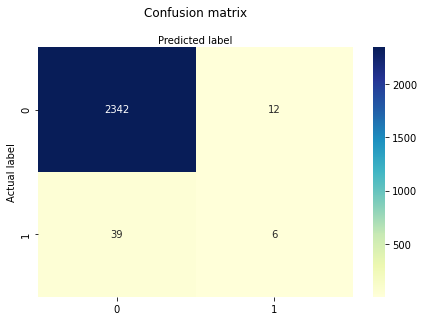

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

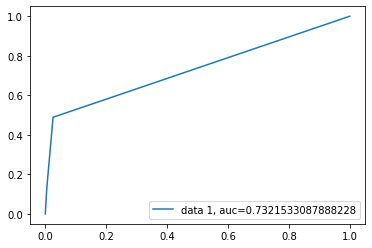

In [17]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [18]:
drafted = pd.read_csv("PredictPlayers.csv")
draft_df = pd.DataFrame.copy(drafted)

In [19]:
#Dropping Columns = Rank, Player, and Season
df2_stats = df.drop(columns=['?Rk','Player', 'Season'])

In [21]:
df2_stats['NRtg'] = df2_stats['ORtg'] - df2_stats['DRtg']


In [24]:
schools2 = ["Kentucky", "North Carolina", "Duke", "UCLA", "Kansas", "Michigan", "Indiana", "Louisville", "Syracuse", "Ohio State", "Arizona", "Michigan State", "Notre Dame", "Connecticut", "Maryland", "Georgia Tech", "Texas", "North Carolina State", "Minnesota", "St. John's (NY)"]
df2_stats['TopSchool'] = df2_stats.apply(lambda row: True if any([item in row['School'] for item in schools]) else False, axis = 1)

In [25]:
confs2 = ["Big East", "Big 12", "Big Ten", "Pac-12", "SEC", "ACC"]
df2_stats['TopConf'] = df2_stats.apply(lambda row: True if any([item in row['Conf'] for item in confs]) else False, axis = 1)


In [26]:
random.seed(111)

In [27]:
feature_cols_pred_all = ['MP', 'G', 'PER', 'TS%', 'eFG%', 'TRB%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'WS', 'DWS', 'TopSchool', 'TopConf', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'PProd', 'OBPM', 'DBPM', 'BPM']
feature_cols_pred = ['MP', 'G', 'PER', 'TRB%', 'USG%', 'ORtg', 'DRtg', 'DWS', 'TopSchool']
feature_cols_pred_topdown = ['TRB%', 'USG%', 'OWS', 'WS', 'TopSchool', 'TopConf', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'BLK%', 'USG%', 'PProd', 'OBPM', 'NRtg']

In [29]:
X_pred = df2_stats[feature_cols_pred_all]

In [30]:
#set seed
random.seed(111)

In [31]:
Y_pred = knn.predict(X_pred)
y_series = pd.Series(Y_pred)
drafted['Drafted'] = y_series

In [32]:
df_results = drafted[drafted['Drafted'] == 1]
print(df_results)

    Rk,Player,Class,Season,Pos,School,Conf,G,MP,PER,TS%,eFG%,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,PProd,ORtg,DRtg,OWS,DWS,WS,OBPM,DBPM,BPM  \
0    1,Mason Jones,JR,2019-20,G,Arkansas,SEC,31,105...                                                                                          
1    2,Reggie Perry,SO,2019-20,F,Mississippi State,...                                                                                          
2    3,Skylar Mays,SR,2019-20,G,Louisiana State,SEC...                                                                                          
5    6,Immanuel Quickley,SO,2019-20,G,Kentucky,SEC,...                                                                                          
7    8,Kerry Blackshear Jr.,SR,2019-20,F,Florida,SE...                                                                                          
10   11,Emmitt Williams,SO,2019-20,F,Louisiana Stat...                                                                            